# Do neighborhoods in Manhattan with the highest median income levels also have the higher prices for a 1-bedroom apartment?

### Hypothesis testing // pitch memo using data from the Census and StreetEasy

Hypothesis: As median income rises in a particular Manhattan neighborhood, so does the price of the average one bedroom apartment

Null Hypothesis: there is no relation between median income level and price of rent for a one bedroom apartment in Manhattan

In [4]:
import pandas as pd

In [12]:
df = pd.read_csv("neighborhoods_rent.csv")
df.head(5)

,Neighborhood,median_income_pc,Max_Rent,AVG_rent,Pct diff,Difference,Unnamed: 6
0,Chelsea-Hudson Yards,116503,2913,4243.0,46%,-1330.0,Pct diff= Average rent is x percent higher tha...
1,Chinatown-Two Bridges,29120,728,2100.0,188%,-1372.0,NaN
2,East Harlem (North),31000,775,1997.0,158%,-1222.0,NaN
3,East Harlem (South),45701,1143,1997.0,75%,-854.0,NaN
4,East Midtown-Turtle Bay,146391,3660,3350.0,-8%,310.0,NaN


In [8]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (8, 8)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [9]:
%%R

require('tidyverse')

R[write to console]: Loading required package: tidyverse



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.1      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [10]:
import numpy as np

# Show a large number of rows and columns when displaying dfs
pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", 200)
from IPython.display import display, HTML

`geom_smooth()` using formula = 'y ~ x'


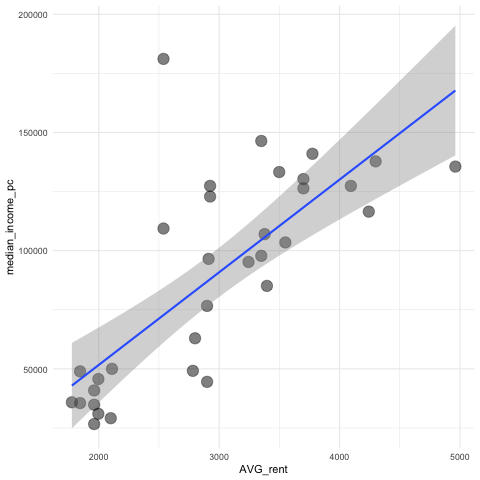

In [23]:
%%R -i df

ggplot(df) +
    aes(x=AVG_rent, y=median_income_pc) +
    geom_point(size=5, alpha=.5) +
    theme_minimal() +
    geom_smooth(method='lm')

Overall it's looking like we have some sort of positive coorelation here but definitely some outliers

In [25]:
%%R
# load the dataset
data(df)

# run a simple linear regression of mpg (dependent variable) on wt (independent variable)
fit <- lm(AVG_rent ~ median_income_pc, data = df)

# summarize the regression results
summary(fit)



Call:
lm(formula = AVG_rent ~ median_income_pc, data = df)

Residuals:
     Min       1Q   Median       3Q      Max 
-1739.28  -330.86    10.85   271.90  1340.45 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)      1.670e+03  2.244e+02   7.442 2.21e-08 ***
median_income_pc 1.440e-02  2.272e-03   6.335 4.74e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 562.4 on 31 degrees of freedom
Multiple R-squared:  0.5642,	Adjusted R-squared:  0.5502 
F-statistic: 40.14 on 1 and 31 DF,  p-value: 4.744e-07



Looks like my P value here is really small -- this would mean we can reject the null hypothesis. It's due to chance!
R Squared values are between 0 and 1 -- and mine is just above the halfway point. About half of the variation in x (median rent price) can be explained by y (median neighborhood income per capita)


## Great! Now what? 

It's great that we can see the statistical relationship between median rents and median income levels. However, some locations had higher rents with lower than expected income levels, so I'd definitely want to do some more digging. Do certain neighborhoods have more expensive high rise buildings? Impacts of gentrification in the past few years? I think it could be really beneficial to speak with housing/urban development experts and planners, real estate experts, and people that live in certain neighborhoods that seem to be outliers. 